In [1]:
#Ref:

#https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import os

os.chdir('C:\\Analytics\\Personal\\Machine Learning\\Training\\R\\Dataset')

In [2]:
# read the data in
df = pd.read_csv("OnlineRetail1.csv",encoding = "ISO-8859-1")
print(df.columns.values)

['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country']


In [3]:
print("Summary Statistics :\n",df.describe())

Summary Statistics :
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
sum(df['CustomerID'].isnull())

135080

In [8]:
## NA value treatment


order_wise = df.dropna()


In [9]:
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
order_wise["Amount"] = order_wise["Quantity"] * 
order_wise["UnitPrice"]
order_wise 


C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [43]:
#order_wise 
order_wise['CustomerID'] = order_wise['CustomerID'].astype(int)
order_wise = order_wise.sort_values(['CustomerID'])
order_wise
  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60
72263,542237,47559B,TEA TIME OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347,Iceland,12.50
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,2011-01-26 14:30:00,1.25,12347,Iceland,12.50
72265,542237,21041,RED RETROSPOT OVEN GLOVE DOUBLE,6,2011-01-26 14:30:00,2.95,12347,Iceland,17.70
72266,542237,21035,SET/2 RED RETROSPOT TEA TOWELS,6,2011-01-26 14:30:00,2.95,12347,Iceland,17.70
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,2011-01-26 14:30:00,12.75,12347,Iceland,38.25
72268,542237,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2011-01-26 14:30:00,4.25,12347,Iceland,25.50
72269,542237,22134,MINI LADLE LOVE HEART RED,12,2011-01-26 14:30:00,0.42,12347,Iceland,5.04
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,2011-10-31 12:25:00,12.75,12347,Iceland,76.50


In [12]:
#Monetary

monetary = order_wise.groupby('CustomerID').aggregate({'Amount': 'sum'})
monetary


,Amount
CustomerID,
12346,0.000000e+00
12347,4.310000e+03
12348,1.797240e+03
12349,1.757550e+03
12350,3.344000e+02
12352,1.545410e+03
12353,8.900000e+01
12354,1.079400e+03
12355,4.594000e+02


In [13]:
monetary['CUSTOMERID'] = monetary.index
monetary

,Amount,CUSTOMERID
CustomerID,,
12346,0.000000e+00,12346
12347,4.310000e+03,12347
12348,1.797240e+03,12348
12349,1.757550e+03,12349
12350,3.344000e+02,12350
12352,1.545410e+03,12352
12353,8.900000e+01,12353
12354,1.079400e+03,12354
12355,4.594000e+02,12355


In [14]:
#Frequency

frequency = order_wise[['CustomerID','InvoiceNo']]
#frequency

k = frequency.groupby('CustomerID').count()
k['CUSTOMERID'] = k.index
k

,InvoiceNo,CUSTOMERID
CustomerID,,
12346,2,12346
12347,182,12347
12348,31,12348
12349,73,12349
12350,17,12350
12352,95,12352
12353,4,12353
12354,58,12354
12355,13,12355


In [15]:
master = pd.merge(monetary, k)
master

,Amount,CUSTOMERID,InvoiceNo
0,0.000000e+00,12346,2
1,4.310000e+03,12347,182
2,1.797240e+03,12348,31
3,1.757550e+03,12349,73
4,3.344000e+02,12350,17
5,1.545410e+03,12352,95
6,8.900000e+01,12353,4
7,1.079400e+03,12354,58
8,4.594000e+02,12355,13
9,2.811430e+03,12356,59


In [35]:
#Recency

recency = order_wise[['CustomerID','InvoiceDate']]
#frequency
#recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate'])
recency['InvoiceDate'] = pd.to_datetime(recency['InvoiceDate'], 
                                        format='%m/%d/%Y %H:%M')
recency




C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CustomerID,InvoiceDate
61619,12346,2011-01-18 10:01:00
61624,12346,2011-01-18 10:17:00
286628,12347,2011-08-02 08:48:00
72263,12347,2011-01-26 14:30:00
72264,12347,2011-01-26 14:30:00
72265,12347,2011-01-26 14:30:00
72266,12347,2011-01-26 14:30:00
72267,12347,2011-01-26 14:30:00
72268,12347,2011-01-26 14:30:00
72269,12347,2011-01-26 14:30:00


In [36]:
maximum = max(recency['InvoiceDate'])
maximum

Timestamp('2011-12-09 12:50:00')

In [37]:
maximum = maximum+ timedelta(days=1)
maximum

Timestamp('2011-12-10 12:50:00')

In [38]:
recency['datediff'] =maximum- recency['InvoiceDate']
recency

C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceDate,datediff
61619,12346,2011-01-18 10:01:00,326 days 02:49:00
61624,12346,2011-01-18 10:17:00,326 days 02:33:00
286628,12347,2011-08-02 08:48:00,130 days 04:02:00
72263,12347,2011-01-26 14:30:00,317 days 22:20:00
72264,12347,2011-01-26 14:30:00,317 days 22:20:00
72265,12347,2011-01-26 14:30:00,317 days 22:20:00
72266,12347,2011-01-26 14:30:00,317 days 22:20:00
72267,12347,2011-01-26 14:30:00,317 days 22:20:00
72268,12347,2011-01-26 14:30:00,317 days 22:20:00
72269,12347,2011-01-26 14:30:00,317 days 22:20:00


In [39]:
df = recency.groupby('CustomerID').aggregate({'datediff': 'min'})
df['CUSTOMERID'] = df.index

df

,datediff,CUSTOMERID
CustomerID,,
12346,326 days 02:33:00,12346
12347,2 days 20:58:00,12347
12348,75 days 23:37:00,12348
12349,19 days 02:59:00,12349
12350,310 days 20:49:00,12350
12352,36 days 22:13:00,12352
12353,204 days 19:03:00,12353
12354,232 days 23:39:00,12354
12355,214 days 23:01:00,12355


In [21]:
RFM = pd.merge(master, df)
RFM

,Amount,CUSTOMERID,InvoiceNo,datediff
0,0.000000e+00,12346,2,326 days 02:33:00
1,4.310000e+03,12347,182,2 days 20:58:00
2,1.797240e+03,12348,31,75 days 23:37:00
3,1.757550e+03,12349,73,19 days 02:59:00
4,3.344000e+02,12350,17,310 days 20:49:00
5,1.545410e+03,12352,95,36 days 22:13:00
6,8.900000e+01,12353,4,204 days 19:03:00
7,1.079400e+03,12354,58,232 days 23:39:00
8,4.594000e+02,12355,13,214 days 23:01:00
9,2.811430e+03,12356,59,23 days 04:10:00


In [22]:
RFM_norm1 = RFM[['Amount','InvoiceNo','datediff']]

In [23]:

RFM_norm1['datediff'] = 
(RFM_norm1['datediff']/ np.timedelta64(1, 'D')).astype(int)
scaler = StandardScaler()
print(scaler.fit(RFM_norm1))

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
X = pd.DataFrame(scaler.transform(RFM_norm1),
            columns= ['Amount','Frequency','Recency'] )
X

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220
5,-0.042958,0.008375,-0.556277
6,-0.220172,-0.383116,1.111152
7,-0.099662,-0.150803,1.389057
8,-0.175102,-0.344397,1.210403
9,0.111089,-0.146500,-0.685305


In [25]:
model = KMeans(n_clusters=5, random_state=11)
model.fit(X)
print (model.labels_)
cluster = model.labels_

[1 0 0 ... 0 2 0]


In [26]:
RFM = pd.concat([RFM,pd.Series(model.labels_)],axis=1)

In [45]:
RFM.columns = ['Amount','CUSTOMERID','Frequency','Recency','Cluster']
RFM

,Amount,CUSTOMERID,Frequency,Recency,Cluster
0,0.000000e+00,12346,2,326 days 02:33:00,1
1,4.310000e+03,12347,182,2 days 20:58:00,0
2,1.797240e+03,12348,31,75 days 23:37:00,0
3,1.757550e+03,12349,73,19 days 02:59:00,0
4,3.344000e+02,12350,17,310 days 20:49:00,1
5,1.545410e+03,12352,95,36 days 22:13:00,0
6,8.900000e+01,12353,4,204 days 19:03:00,1
7,1.079400e+03,12354,58,232 days 23:39:00,1
8,4.594000e+02,12355,13,214 days 23:01:00,1
9,2.811430e+03,12356,59,23 days 04:10:00,0


In [46]:
df_M = RFM.groupby('Cluster').aggregate({'Amount': 'mean'})
#df_M['CUSTOMERID'] = df_M.index
df_F = RFM.groupby('Cluster').aggregate({'Frequency': 'mean'})
#df_R = RFM.groupby('Cluster').aggregate({'Recency': 'mean'})
df_M

,Amount
Cluster,
0,1299.610968
1,466.381997
2,10857.531867
3,64776.602500
4,192103.854000


<Container object of 5 artists>

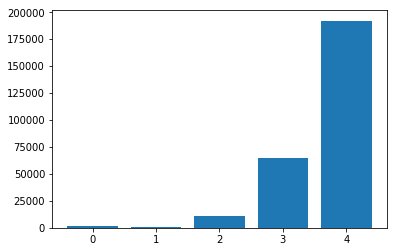

In [48]:
plt.bar(range(0, 5), df_M['Amount'])